# **Project Name-** Uber Supply demand gap analysis

# **Project Summary**-

This project presents a comprehensive Exploratory Data Analysis (EDA) of Uber ride request data to understand and diagnose the supply-demand dynamics that impact trip fulfillment. As one of the leading ride-hailing platforms, Uber handles thousands of ride requests daily from various pickup points like city centers and airports. However, not all ride requests translate into successful trips due to operational challenges.

The goal of this analysis is to identify the temporal (time-based) and spatial (location-based) patterns that influence whether a ride is completed, cancelled, or goes unfulfilled due to the unavailability of drivers.

By diving into the data across time slots, weekdays, pickup locations, and driver assignment behavior, this project uncovers hidden inefficiencies and imbalances in Uber’s service performance.

The findings aim to provide data-driven insights that can guide business teams in optimizing driver deployment, enhancing rider experience, and minimizing lost revenue due to unmet demand.

# **Github Link-**

# **Problem Statement**-

Uber operates in a complex on-demand ecosystem where the real-time balance between rider demand and driver supply is critical. However, due to factors such as uneven driver availability, high peak-time demand, and geographic bottlenecks, many ride requests either get cancelled or go unfulfilled with the status “No Cars Available.”

The primary problem faced by Uber in this dataset is the inability to meet demand at specific times and locations, which leads to a high proportion of unsuccessful ride requests.

This imbalance results in customer dissatisfaction, decreased platform reliability, and lost revenue.

The objective of this EDA is to systematically investigate the supply-demand gap by examining:

1. When (which hours and days) most requests go unfulfilled
2. Where (City vs. Airport) cancellations and no-car cases are concentrated
3. How driver utilization varies across time
4. Which segments (time-slot + location combinations) suffer from the most critical service gaps

Through this investigation, the project seeks to provide actionable recommendations to address these inefficiencies and guide Uber toward more effective resource management.

# **Data Wrangling** (Import Libraries and Data)

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#fetching the dataset

df=pd.read_csv("Uber Request Data- cleaned data.csv")

In [3]:
#knowing the columns of dataset

df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Request hours', 'Drop timestamp', 'Drop hours',
       'Day', 'Hour', 'Slot'],
      dtype='object')

In [4]:
#checking the dataset

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hours,Drop timestamp,Drop hours,Day,Hour,Slot
0,619,Airport,1.0,Trip Completed,11-07-2016,11:51:00,11-07-2016,13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,11-07-2016,17:57:00,11-07-2016,18:47:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,12-07-2016,09:17:00,12-07-2016,09:58:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,12-07-2016,21:08:00,12-07-2016,22:03:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47,Wednesday,8,Morning


In [5]:
#checking the rows and columns of dataset

df.shape

(6745, 11)

In [6]:
#checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Request hours      6745 non-null   object 
 6   Drop timestamp     2831 non-null   object 
 7   Drop hours         2831 non-null   object 
 8   Day                6745 non-null   object 
 9   Hour               6745 non-null   int64  
 10  Slot               6745 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 579.8+ KB


# **Dataset Description**-

This dataset contains cleaned records of Uber ride requests made over a specific period. It is structured to support time-series, trend, and categorical analyses relevant to transportation demand, service availability, and operational bottlenecks.

1. **Request id-** A unique integer identifier for each ride request.

2. **Pickup point-** Indicates the origin of the request — either from the City or Airport.

3. **Driver id-** The identifier of the driver assigned. Null if no driver was allocated.

4. **Status-** Final status of the ride: Trip Completed, Cancelled, or No Cars Available.

5. **Request timestamp-**	Date when the ride was requested.

6. **Request hours-** Time of the request.

7. **Drop timestamp-** Date of drop-off (if trip was completed).

8. **Drop hours-** Time of drop-off

9. **Day-** Day of the week on which the request was made.

10. **Hour-** Hour extracted from the request time

11. **Slot-**	Time-of-day segment categorized from Hour

# **Data Cleaning**-

In [7]:
#Checking missing or null values

df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Request hours,0
Drop timestamp,3914
Drop hours,3914
Day,0
Hour,0


In [8]:
# Replacing all missing values in driver id with "Not Available"

df["Driver id"].fillna("Not Available",inplace=True)

In [9]:
# Replacing all missing values in drop timestamp with "Not Available"

df["Drop timestamp"].fillna("Not Available",inplace=True)

In [10]:
# Replacing all missing values in drop hours with "Not Available"

df["Drop hours"].fillna("Not Available",inplace=True)

In [11]:
# checking whether missing/blank values are removed or not

df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,0
Status,0
Request timestamp,0
Request hours,0
Drop timestamp,0
Drop hours,0
Day,0
Hour,0


# **What all manipulations have you done and insights you found?**

The following manipulations I have done to our dataset:-

1. As there were no duplicates found, no issue is there of removing that.

2. There were total 3 columns having missing values which is going to be replaced with Not Available value.



*   Driver id -- 2650
*   Drop timestamp -- 3914
*   Drop hours -- 3914

# **Data Visualization**-

# **Univariate Analysis**-

# **Chart 1-**

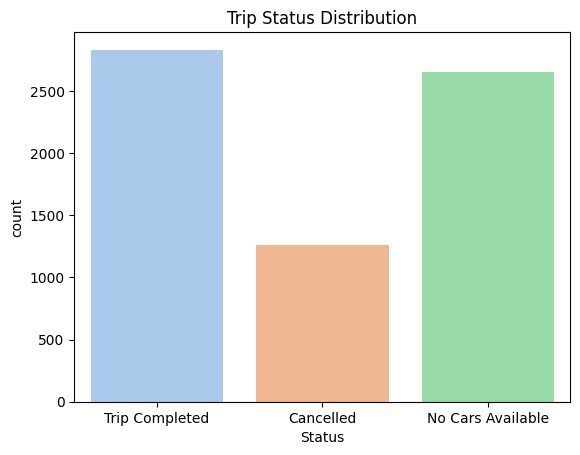

In [15]:
# Status wise Distribution
sns.countplot(data=df, x='Status', palette='pastel')
plt.title("Trip Status Distribution")
plt.show()

# **Findings**-

1. Trip Completed has the highest count – most rides were successfully fulfilled.

2. No Cars Available is the second highest – shows supply-demand imbalance.

3. Cancelled has the lowest count – fewer user or system-triggered cancellations.

4. Opportunity exists to optimize car availability and reduce trip failures.

# **Chart 2-**

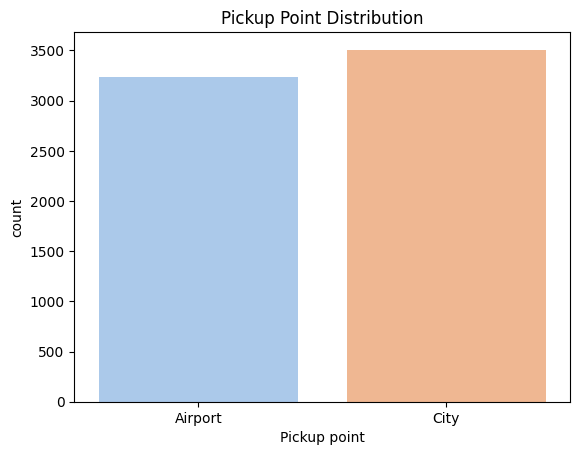

In [13]:
# Pickup point distribution

sns.countplot(data=df, x='Pickup point', palette='pastel')
plt.title("Pickup Point Distribution")
plt.show()

# **Findings-**

1. City pickups slightly exceed Airport pickups, indicating higher ride demand from urban areas.

2. Both pickup points show high usage, suggesting a balanced service need across locations.

# **Chart 3-**

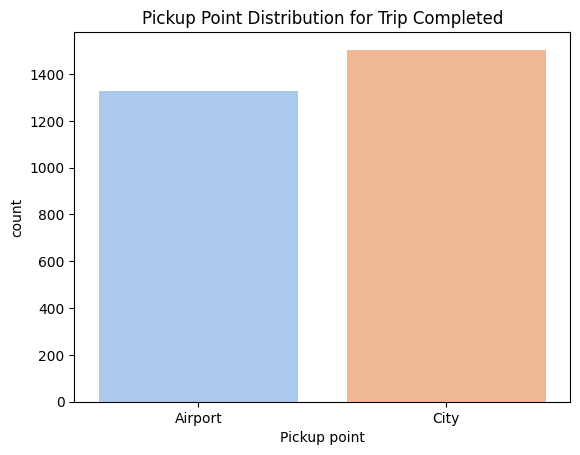

In [16]:
# Count of each pickup point for each trip completed

sns.countplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup point', palette='pastel')
plt.title("Pickup Point Distribution for Trip Completed")
plt.show()

# **Findings-**

1. City pickups led to more trip completions than Airport pickups.

2. Both pickup points show strong completion rates, with City slightly ahead.

# **Chart 4-**

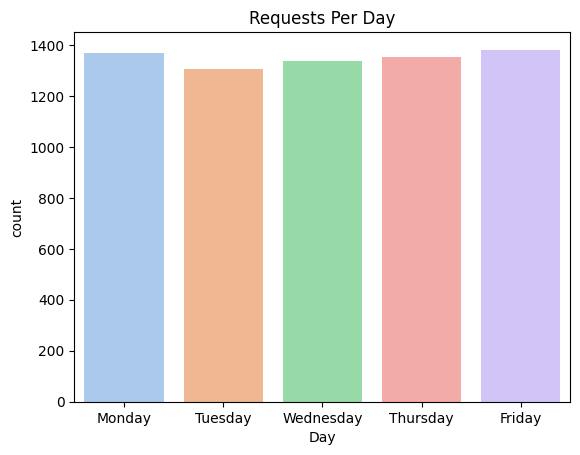

In [17]:
# Requests Per Day

sns.countplot(data=df, x='Day', palette='pastel')
plt.title("Requests Per Day")
plt.show()

# **Findings-**

1. Requests are consistently high throughout the weekdays, showing steady demand.

2. Monday and Friday record slightly higher request counts compared to other days.

# **Chart 5-**

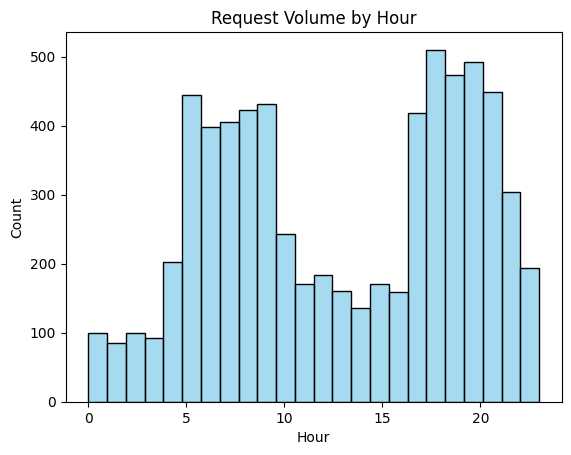

In [21]:
# Requests Per hour

sns.histplot(data=df, x='Hour', bins=24, kde=False, color="skyblue")
plt.title("Request Volume by Hour")
plt.show()

# **Findings-**

1. Peak request hours are around 6–9 AM and 5–9 PM, indicating strong commuter demand.

2. Mid day and late-night hours show significantly lower request volumes, suggesting off-peak periods.

3. The pattern reflects typical daily travel behavior with morning and evening spikes.

# **Chart 6-**

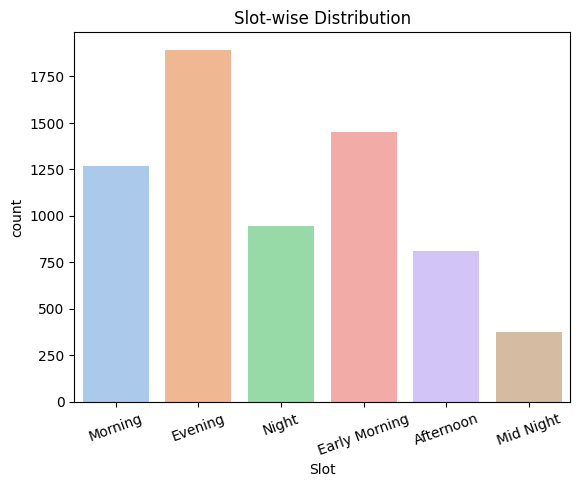

In [28]:
# Slot-wise distribution

sns.countplot(data=df, x='Slot', palette='pastel')
plt.title("Slot-wise Distribution")
plt.xticks(rotation = 20)
plt.show()

# **Findings-**

1. Evening has the highest request volume, followed by Early Morning and Morning, indicating peak user demand during start and end of the day.

2. Night and Afternoon show moderate activity, while Mid Night has the lowest usage.

# **Chart 7**

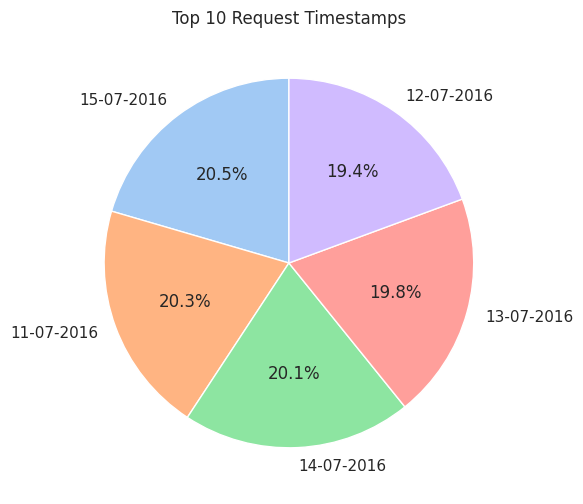

In [67]:
# Top 5 request timestamps with pie chart

top_timestamps = df['Request timestamp'].value_counts().head(5)

plt.figure(figsize=(6, 6))
plt.pie(top_timestamps, labels=top_timestamps.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Top 10 Request Timestamps")
plt.show()

# **Findings-**

1. The highest volume of requests occurred between 11–15 July 2016, each day contributing around 20-21%
2. 15-07-2016 had the largest share, indicating a possible surge in demand on that date.

# **Bivariate Analysis**

# **Chart 8-**

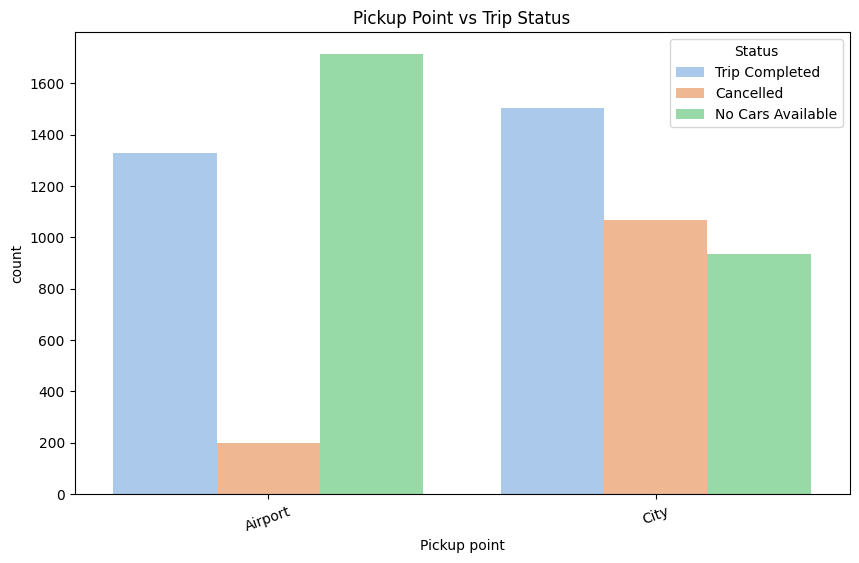

In [37]:
# Pickup Point vs Trip Status

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='pastel')
plt.title("Pickup Point vs Trip Status")
plt.xticks(rotation=20)
plt.show()

# **Findings-**

1. At the Airport, the majority of failed requests are due to "No Cars Available", indicating a severe supply shortage.

2. In contrast, City pickups have more completed trips and higher cancellation rates, suggesting rider drop-offs likely due to wait times or other issues.

3. The supply-demand gap is more prominent at the Airport, requiring attention to fleet availability.

# **Chart 9-**

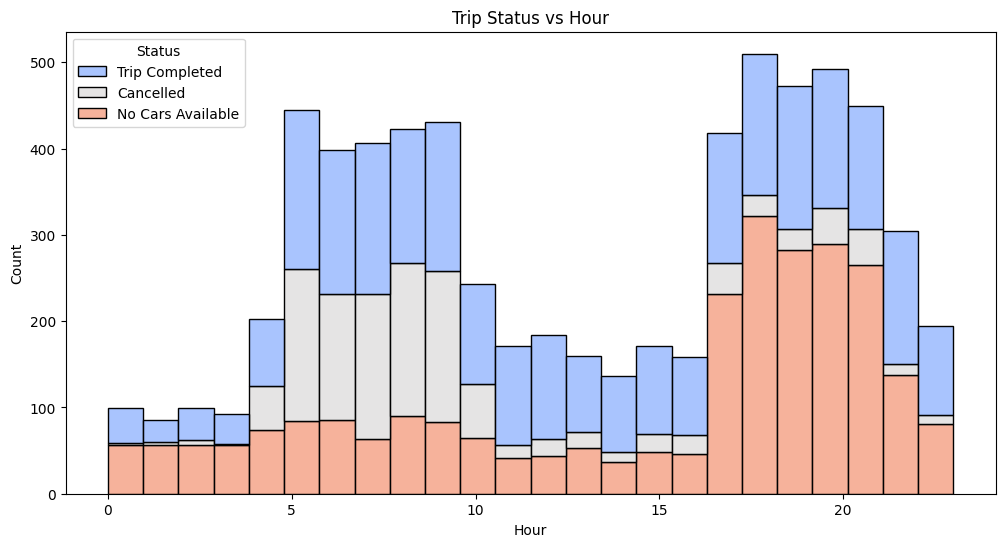

In [52]:
# Trip status vs hour

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour', hue='Status', multiple = 'stack', palette='coolwarm', bins=24)
plt.title("Trip Status vs Hour")
plt.show()

# **Findings-**

1. High demand hours are between 5–10 AM and 5–9 PM, showing peak traffic periods.

2. Morning peak has a high rate of cancellations, while the evening peak sees more "No Cars Available" cases, indicating a supply shortage.

3. Trip completions are strongest in the early morning and evening, but not enough to meet total demand.

# **Chart 10-**

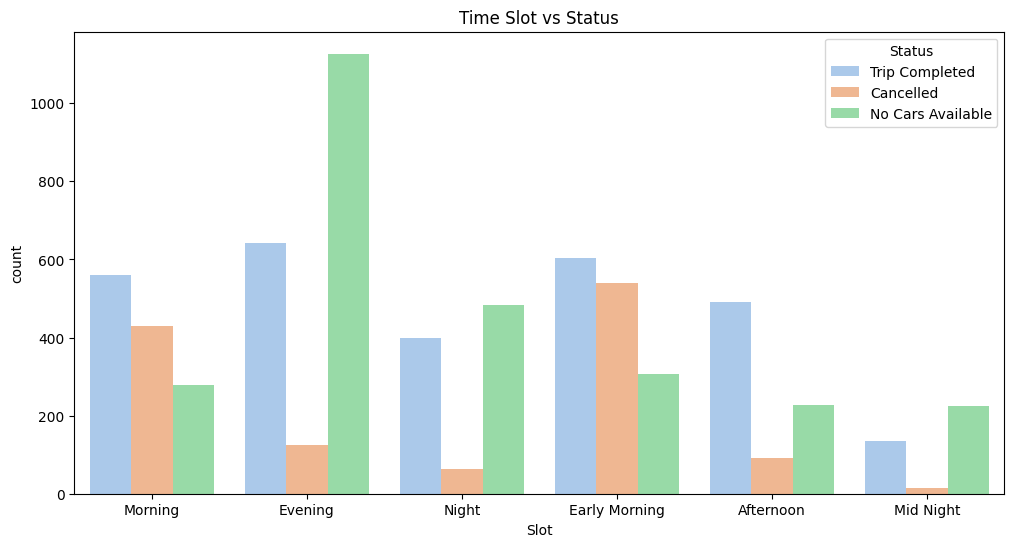

In [50]:
# Time Slot vs Status

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Slot', hue='Status', palette='pastel')
plt.title("Time Slot vs Status")
plt.show()

# **Findings-**

1. Evening shows a major supply gap with the highest count of "No Cars Available" despite high demand.

2. Early Morning and Morning slots have higher cancellations, hinting at user-side drop-offs.

3. Trip completions are relatively higher during Afternoon and Early Morning, indicating better supply alignment.

# **Chart 11-**

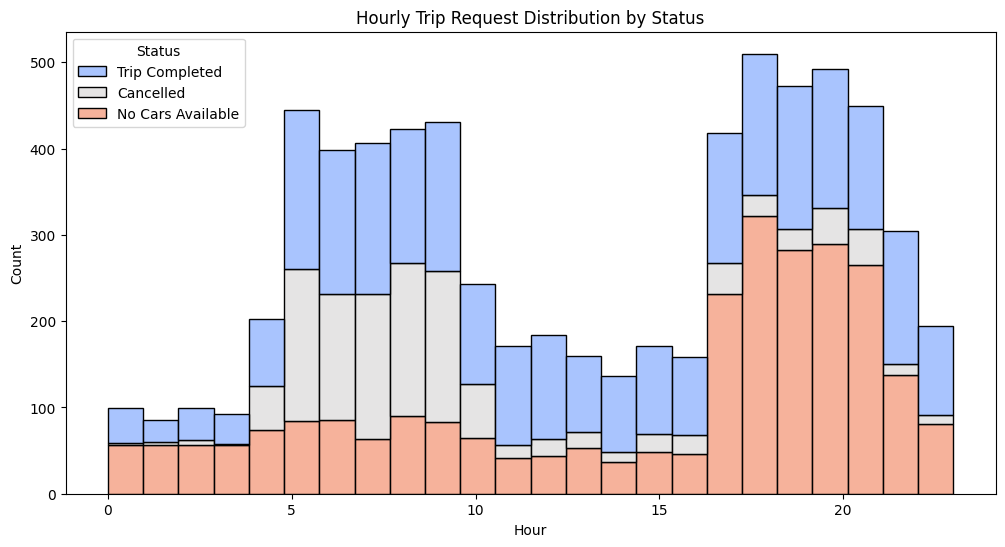

In [51]:
# Hourly demand supply distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour', hue='Status', multiple='stack', palette='coolwarm', bins=24)
plt.title("Hourly Trip Request Distribution by Status")
plt.show()

# **Findings-**

1. Morning (5–10 AM) sees high cancellation rates, while evening hours (5–9 PM) suffer heavily from "No Cars Available", highlighting peak-time supply issues.

2. Trip completions are consistent but not dominant during either peak, indicating unmet demand.

3. The supply-demand gap is most critical in the evening, where requests surge but cars are scarce.

# **Chart 12-**

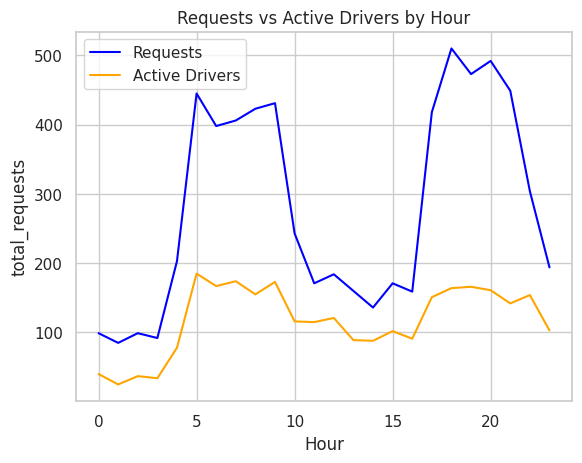

In [59]:
# Requests vs Active drivers

driver_hour = df.groupby('Hour').agg(
    total_requests=('Request id', 'count'),
    active_drivers=('Status', lambda x: (x == 'Trip Completed').sum())
).reset_index()

sns.lineplot(data=driver_hour, x='Hour', y='total_requests', label='Requests', color = 'blue')
sns.lineplot(data=driver_hour, x='Hour', y='active_drivers', label='Active Drivers', color = 'orange')

plt.title("Requests vs Active Drivers by Hour")
plt.show()

# **Findings-**

1. Requests peak sharply during morning (5–10 AM) and evening (5–9 PM), while active drivers remain consistently low throughout the day.

2. The demand far exceeds supply during peak hours, highlighting significant unmet trip requests.

3. Strategic driver allocation during these hours could help bridge the gap and improve fulfillment rates.

# **Chart 13-**

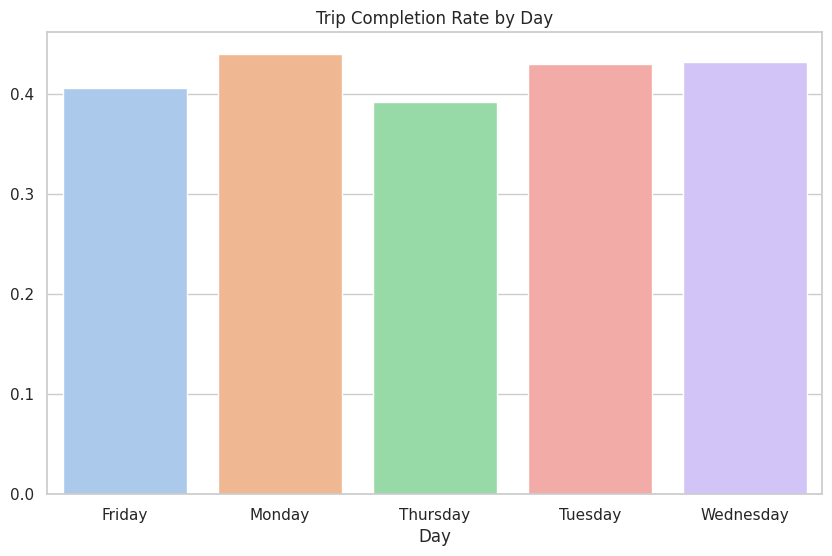

In [65]:
# Trip completion rate by day

day_completion_rate = df[df['Status'] == 'Trip Completed'].groupby('Day').size() / df.groupby('Day').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_completion_rate.index, y=day_completion_rate.values, palette='pastel')
plt.title("Trip Completion Rate by Day")
plt.show()

# **Findings-**

1. Monday has the highest trip completion rate, followed closely by Tuesday and Wednesday.

2. Thursday has the lowest completion rate, indicating more trip failures or cancellations.

# **Multivariate analysis**-



#**Chart 14**-

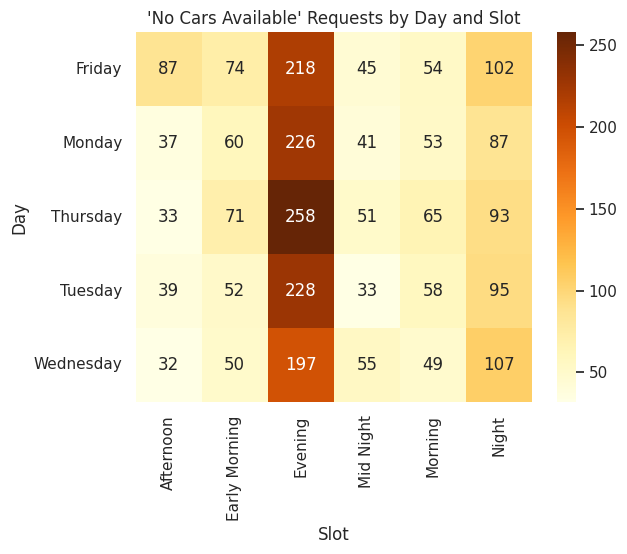

In [68]:
# No car availability by day and different time slots

pivot = df.pivot_table(index='Day', columns='Slot', values='Status', aggfunc=lambda x: (x=='No Cars Available').sum())
sns.heatmap(pivot, cmap='YlOrBr', annot=True, fmt='d')
plt.title("'No Cars Available' Requests by Day and Slot")
plt.show()

# **Findings-**

1. Evening slots across all weekdays have the highest concentration of unfulfilled requests, especially on Thursday (258) and Tuesday (228).

2. Thursday evening is the worst-affected period, indicating a severe supply shortage during that time.

3. Morning and Early Morning slots consistently show lower unavailability but still notable gaps.

# **Chart 15-**

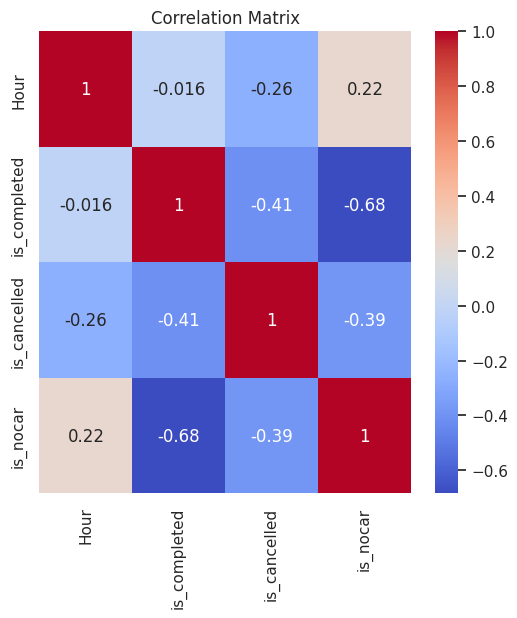

In [73]:
# Correlation among numerical features

# Select numeric features
numeric_df = df[['Hour']].copy()
numeric_df['is_completed'] = df['Status'] == 'Trip Completed'
numeric_df['is_cancelled'] = df['Status'] == 'Cancelled'
numeric_df['is_nocar'] = df['Status'] == 'No Cars Available'

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Findings**

1. Trip completion is strongly negatively correlated with No Cars Available, indicating supply shortages directly reduce successful trips.

2. Trip cancellations are also moderately negatively correlated with completions, suggesting they contribute to unmet demand.

3. Hour of request has a positive correlation with no-car availability, implying that later hours tend to face supply issues.

# **Chart 16-**

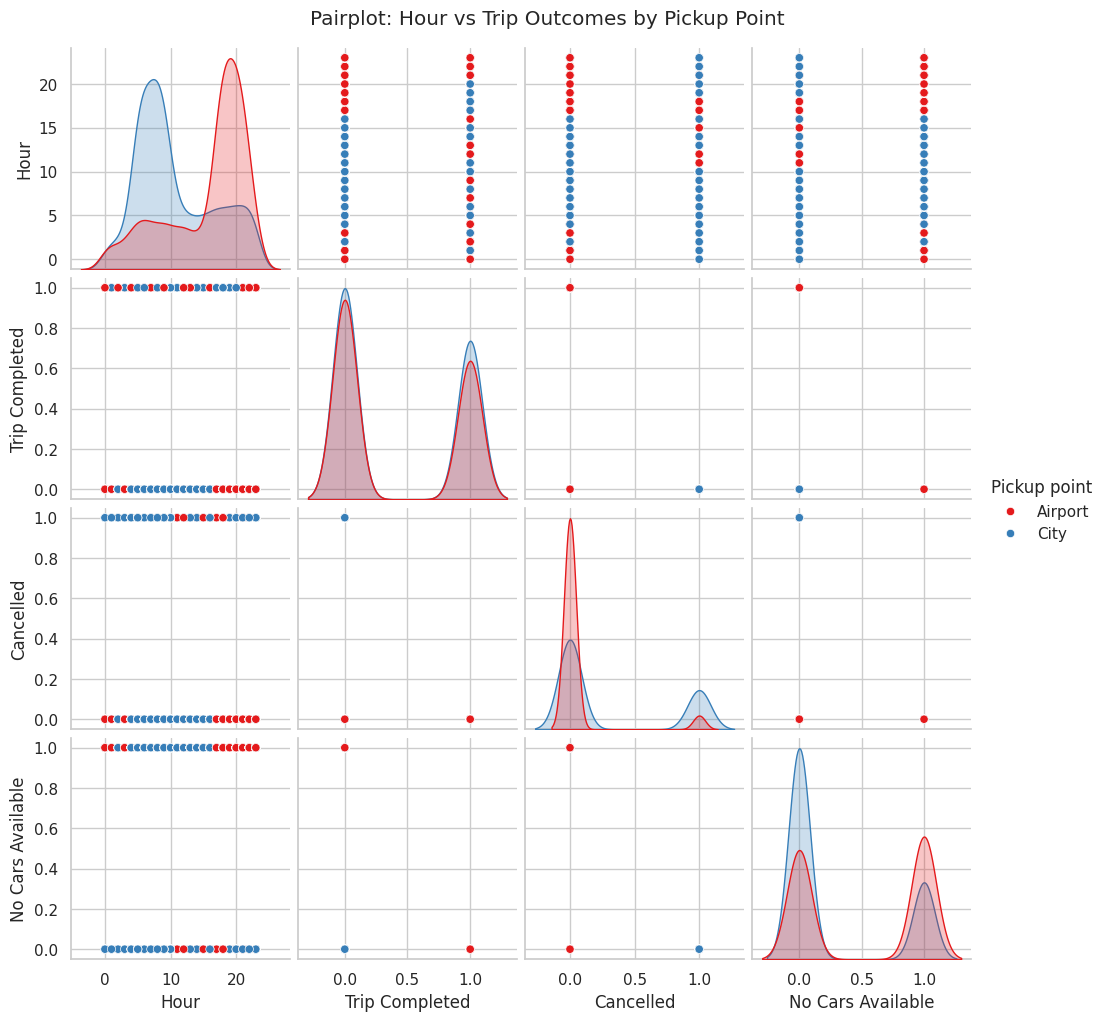

In [81]:
# Pairplot: Hour, Pickup Point, and Status

# Create numerical + categorical data for multivariate pairplot
df_pair = df[['Hour', 'Pickup point', 'Status']].copy()
df_pair['Trip Completed'] = (df['Status'] == 'Trip Completed').astype(int)
df_pair['Cancelled'] = (df['Status'] == 'Cancelled').astype(int)
df_pair['No Cars Available'] = (df['Status'] == 'No Cars Available').astype(int)

# Generate pairplot with pickup point as hue
sns.pairplot(df_pair, hue='Pickup point', vars=['Hour', 'Trip Completed', 'Cancelled', 'No Cars Available'], palette='Set1')
plt.suptitle("Pairplot: Hour vs Trip Outcomes by Pickup Point", y=1.02)
plt.show()

# **Findings-**

1. Airport pickups (red) are more concentrated in early morning hours, while City pickups (blue) peak during late evening.

2. Trip completions are higher and more consistently spread for City pickups, especially during peak evening hours.

3. Cancellations and 'No Cars Available' cases occur more frequently in Airport pickups, particularly around the early morning time.

# **Chart 17-**

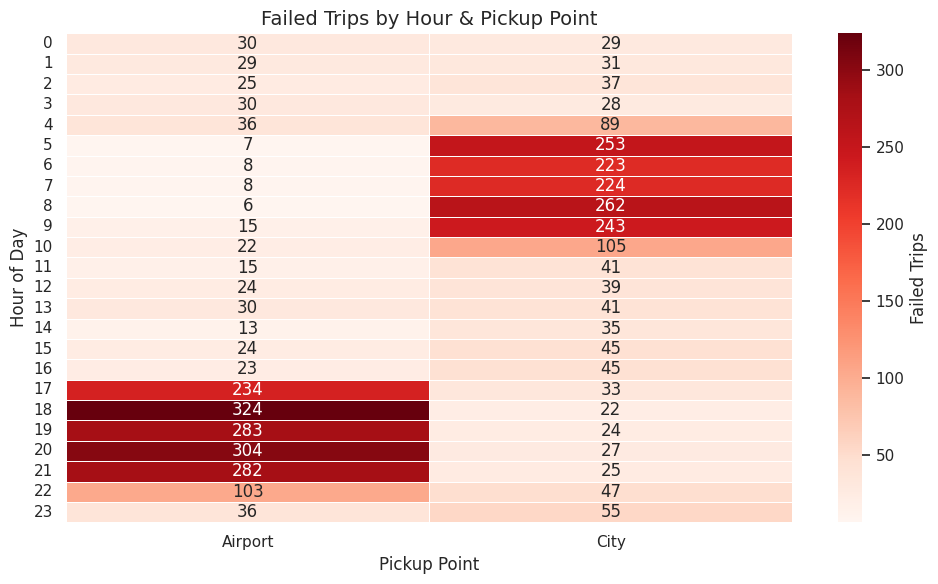

In [85]:
# Heatmap: Categorical Crosstab – Hour vs Pickup Point for Failures

failed = df[df['Status'] != 'Trip Completed']
fail_matrix = pd.crosstab(failed['Hour'], failed['Pickup point'])

plt.figure(figsize=(10,6))
sns.heatmap(
    fail_matrix,
    cmap="Reds",               # Stronger gradient
    annot=True, fmt="d",       # Show actual counts
    linewidths=0.5,            # Gridlines
    cbar_kws={'label': 'Failed Trips'}
)

plt.title("Failed Trips by Hour & Pickup Point", fontsize=14)
plt.xlabel("Pickup Point")
plt.ylabel("Hour of Day")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Findings**-

1. Airport pickups experience a significant spike in failed trips during the evening rush hours (17:00–21:00), peaking at 304 failures at 20:00.

2. City pickups face the most failures during early morning (5:00–9:00), with a peak at 08:00 (262 failures).

3. Outside these peak hours, both pickup locations show relatively low failure counts.

# **Conclusion and Recommendations**

**Final words**

1. A significant number of failed trip requests (either cancelled or due to no cars available) occurred during early morning (5–9 AM) and evening (5–9 PM) hours, revealing mismatched supply-demand alignment at critical hours.

2. The majority of failures due to "No Cars Available" were from the Airport, especially in the evening, indicating under-supply at that location during peak demand periods.

3. Line plots revealed a substantial gap between total ride requests and active drivers during peak hours, which contributes to unmet demand.

4. While Monday saw the highest trip completion rate, Thursday had the lowest, suggesting that service performance is inconsistent across weekdays.

5. The correlation matrix shows that trip completions are negatively correlated with cancellations and “no car available” status, especially during specific hours.

**Action plan**

1. Deploy more drivers to the Airport during evening hours and to the City during early mornings to mitigate high failure rates.

2. Introduce surge pricing, bonuses, or guaranteed earnings for drivers operating during 5–9 AM and 5–9 PM slots, particularly on high-demand weekdays.

3. Use historical demand data to build predictive models that forecast ride requests by hour and location. Schedule drivers accordingly to reduce mismatch.

4. Encourage a rotational model where drivers alternate between Airport and City pickups, preventing concentration in low-demand zones.

5. Improve rider experience by proactively communicating likely delays or offering alternate pickup windows when “No Cars Available” scenarios are expected.

6. Investigate Thursday operations for inefficiencies (e.g., driver availability or rider behavior) and take targeted corrective actions.